In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

#  Building  Model To train the data 

In [28]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [29]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [33]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "D:/Train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 318 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [35]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "D:\Train", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 318 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

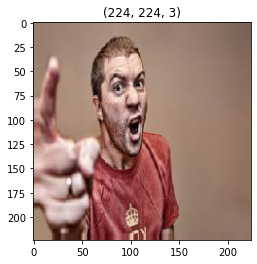

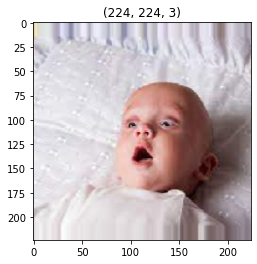

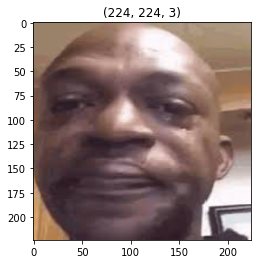

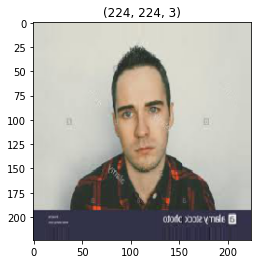

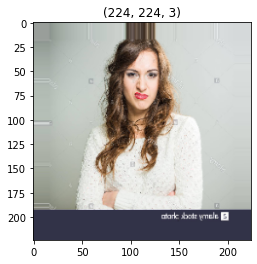

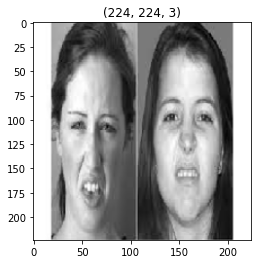

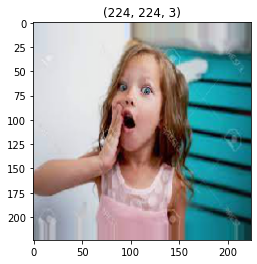

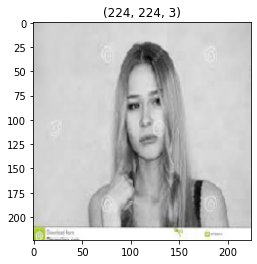

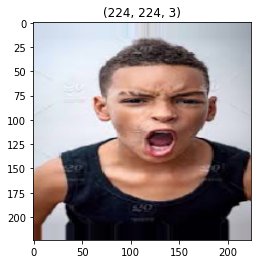

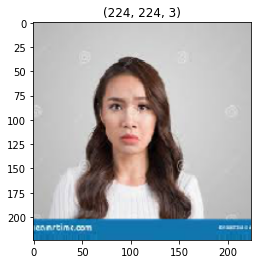

In [36]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

# having early stopping and model check point

In [37]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="bestModel.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [38]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

C:\Users\sansk\AppData\Local\Temp/ipykernel_5684/564963302.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 8.7073 - accuracy: 0.2358
Epoch 00001: val_accuracy improved from -inf to 0.58594, saving model to bestModel.h5
10/10 [==============================] - 13s 1s/step - loss: 8.7073 - accuracy: 0.2358 - val_loss: 3.2504 - val_accuracy: 0.5859
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 3.3257 - accuracy: 0.5692
Epoch 00002: val_accuracy improved from 0.58594 to 0.75391, saving model to bestModel.h5
10/10 [==============================] - 9s 879ms/step - loss: 3.3257 - accuracy: 0.5692 - val_loss: 1.7566 - val_accuracy: 0.7539
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 1.4289 - accuracy: 0.7358
Epoch 00003: val_accuracy improved from 0.75391 to 0.89062, saving model to bestModel.h5
10/10 [==============================] - 9s 873ms/step - loss: 1.4289 - accuracy: 0.7358 - val_loss: 0.4699 - val_accuracy: 0.8906
Epoch 4/30
10/10 [==============================] - ETA: 0s - l

In [45]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

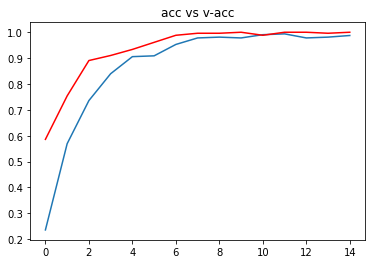

In [46]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

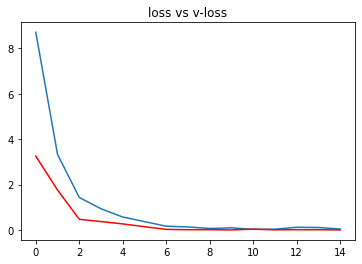

In [47]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()